In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

Transform normal distributed variables to follow uniform [a,b] distribution

In [2]:
def norm2unif(x,a,b):
    """Transform normal distributed variables to follow uniform [a,b] distribution"""
    y = a+(b-a)*norm.cdf(np.asarray(x))
    return y

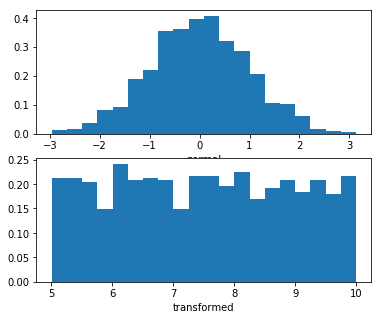

In [3]:
# test
x = np.random.normal(size=1000)
y = norm2unif(x,5,10) # transform

plt.figure(figsize=(6,5))
plt.subplot(211)
plt.hist(x,20,density=True)
plt.xlabel('normal')
plt.subplot(212)
plt.hist(y,20,density=True)
plt.xlabel('transformed')
plt.show()

Get the lognormal parameters given bounds [a,b] in linear scale that corresponds to n_sigma

In [4]:
def range2logn(a,b,n_sigma=2):
    """Get the lognormal parameters given range [a,b] in linear scale that corresponds to n_sigma"""
    A = np.log(a)
    B = np.log(b)
    mu = (A+B)/2
    sigma = (B-A)/n_sigma/2
    return mu, sigma

In [5]:
bound = [6,18]
logn_param = range2logn(bound[0],bound[1])

In [6]:
def norm2logn(x,mu,sigma):
    """Transform normal distributed variables to follow lognormal (mu,sigma) distribution"""
    y = np.exp(mu+sigma*x)
    return y

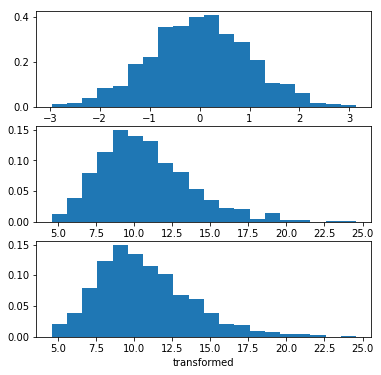

In [7]:
y = norm2logn(x,logn_param[0],logn_param[1]) # transform
# equivalently
xx = np.random.normal(logn_param[0],logn_param[1],size=1000)
yy = np.exp(xx) # transform

plt.figure(figsize=(6,6))
plt.subplot(311)
plt.hist(x,20,density=True)
plt.xlabel('normal')
plt.subplot(312)
_,bins,_ = plt.hist(y,20,density=True)
plt.xlabel('transformed')
plt.subplot(313)
plt.hist(yy,bins,density=True)
plt.xlabel('transformed')
plt.show()